# Importação de pacotes para ambiente do Python Colab

In [1]:
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importação do dataset e normalização dos dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_transformed.csv to df_transformed.csv


In [ ]:
import pandas as pd
import io
X = pd.read_csv(io.StringIO(uploaded['df_transformed.csv'].decode('utf-8')),header=0, sep=',')
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.928571,0.25,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.033333,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.25,0.0,0.000000,0.170213,0.741935,0.194471,1.0,0.0,0.25,1.0,0.0,0.454545,0.631579,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.821429,0.50,0.0,0.225926,0.978723,0.354839,0.194471,0.0,0.0,0.00,1.0,0.0,0.212121,0.631579,0.016667,1.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,0.75,0.0,0.596296,0.000000,0.387097,0.194471,0.0,0.0,0.50,1.0,1.0,0.151515,0.263158,0.033333,1.0,0.0,0.0,0.0,0.0,0.0
4,0.821429,0.75,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.016667,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#normalizar os atributos contínuos com MinMaxScaler() ou StandardScaler
mms = MinMaxScaler()

#normalizar atributos contínuos do conjunto de dados wine
mms.fit(X)
X

array([[ 0.80493838, -0.64394734, -1.3901746 , ..., -0.2125976 ,
        -0.09041232, -0.10454167],
       [-2.28012426, -0.64394734, -1.3901746 , ..., -0.2125976 ,
        -0.09041232, -0.10454167],
       [ 0.44896961,  0.0599242 , -1.3901746 , ..., -0.2125976 ,
        -0.09041232, -0.10454167],
       ...,
       [-2.28012426, -0.64394734, -1.3901746 , ..., -0.2125976 ,
        -0.09041232,  9.56556323],
       [-2.28012426,  0.0599242 , -0.49014905, ..., -0.2125976 ,
        -0.09041232, -0.10454167],
       [-2.28012426,  1.46766727,  0.4098765 , ..., -0.2125976 ,
        -0.09041232, -0.10454167]])

# Algoritmo de agrupamento de cluster DBSCAN




In [ ]:
# Agrupar usando algoritmo DBSCAN
db = DBSCAN(eps=5.6, min_samples=3,metric='euclidean').fit(X)

# Contar número de clusters
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de dados ruidosos: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Número estimado de clusters: 4
Número estimado de dados ruidosos: 0
Silhouette Coefficient: 0.294


In [ ]:
# Array de separação dos clusters
# ausência de dados com valor -1 (ruído)
db.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# plt.scatter(X[:,0], X[:,6],c=db.labels_)

grafico = px.scatter(X[:,0], X[:,4],color = db.labels_)
grafico.show()

In [ ]:
# Outro gráfico
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

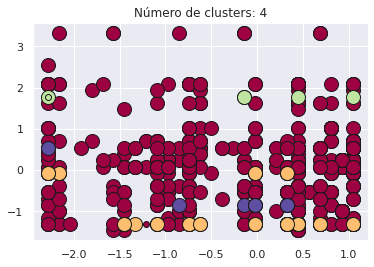

In [ ]:
# Outro gráfico

# A cor preta será usada para os dados ruidosos
unique_labels = set(labels)
# cm.Spectral acessa o Color map Spectral
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
          #linspace gera números igualmente espaçados no intervalo definido
for k, col in zip(unique_labels, colors):
  #zip: iteração paralela
    if k == -1:
        # Preto para ruidos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 5], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 5], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número de clusters: %d' % n_clusters_)
plt.show()